# **HAVOK study** | forcing characterization

*Ref*: [github@baronefr/havok-analysis](github.com/baronefr/havok-analysis)

In this notebook we show a sample of the havok analysis using our **rhavok library**.

In [1]:
from rhavok.havok import havok

import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fftshift

#### Data import

We import the test dataset from a previously done HAVOK analysis.

In [ ]:
data_path = './data/data_havok/'
vv = np.loadtxt(data_path + 'test_v.csv')
tt = np.loadtxt(data_path + 'test_t.csv')
xx = np.loadtxt(data_path + 'test_x.csv')

In [ ]:
v15 = vv[:,-1]
v14 = vv[:,14]

## part 1 | hard thresholding

In [3]:
def activity_by_threshold(forcing, thres = 0.002):
    
    above_thres = abs(forcing) > thres
    thres_expand = 500
    switch = False
    for i in range(0,len(above_thres)):
        if above_thres[i]:
            if not switch:
                above_thres[i:i+thres_expand] = True
                switch = True
        else:
            switch = False
    
    return above_thres

In [4]:
def yaroc(obj, data, forcing, thres = 0.002):
    
    active_mask = activity_by_threshold(forcing, thres = thres)
    
    nswitch = 0
    ntrigger = 0
    tp = 0
    
    ntimeseries = len(data)
    prev_value = data[0]
    prev_trigger = False
    # let's walk though the timeseries
    for i in range(ntimeseries):
        if prev_value*data[i] <= 0:
            # there is a sign switch
            nswitch += 1
            if np.any(active_mask[(i-200):i]): tp += 1
            prev_value = data[i]
            
        if (active_mask[i] == True) and (prev_trigger == False): ntrigger += 1
        prev_trigger = active_mask[i]
    return tp, nswitch, ntrigger

In [12]:
tp, nsw, ntr = yaroc(None, xx, vv[:,-1])
print("tpr = {}, fpr = {}".format( round(tp/nsw,3), round(1 - (tp/ntr),3)))
def_thres = (tp/nsw, 1 - (tp/ntr))

tpr = 0.961, fpr = 0.158


In [21]:
thr_test = np.arange(0.0001, 0.015, 0.0001)
n = len(thr_test)
print("testing {} thresholds".format(n))
tpr = np.empty(n)
fpr = np.empty(n)
for i, ths in enumerate(thr_test):
    tp, nsw, ntr = yaroc(lorh, data, forcing, thres=ths)
    tpr[i] = tp/nsw
    fpr[i] = 1 - (tp/ntr)

testing 149 thresholds


Text(0, 0.5, 'TPR')

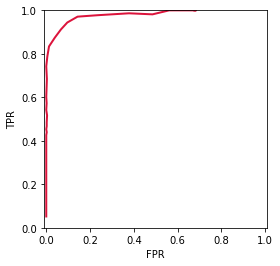

In [26]:
plt.figure(figsize=(4,4))
plt.plot(fpr,tpr,lw=2,c='crimson', label='ROC threshold')
plt.xlim([-.01,1.01])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')

In [34]:
f, t, Sxx = signal.spectrogram(forcing, 1/0.001)

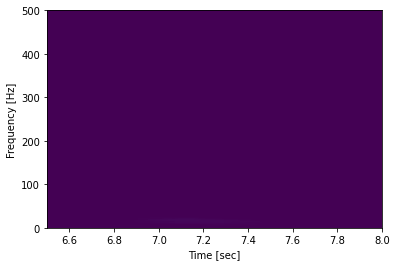

In [47]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim([6.5,8])
#plt.ylim([0,10000])
plt.show()

(6000.0, 8000.0)

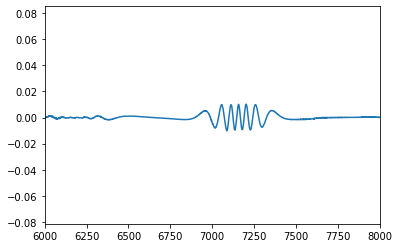

In [45]:
plt.plot(forcing)
plt.xlim([6000,8000])

In [83]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

smoothed = moving_average(forcing, n=20)

(6000.0, 8000.0)

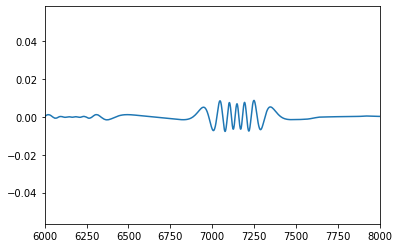

In [84]:
plt.plot(smoothed)
plt.xlim([6000,8000])

In [85]:
selsig = smoothed
n = len(selsig)
q = 100
mw = np.copy( selsig[:q] )

zcr = np.empty(n-q)
for i in range(n-q):
    zero_crosses = np.nonzero(np.diff(mw > 0))[0]
    zcr[i] = zero_crosses.size
    mw = np.roll(mw, -1)
    mw[-1] = selsig[q+i]

(6000.0, 10000.0)

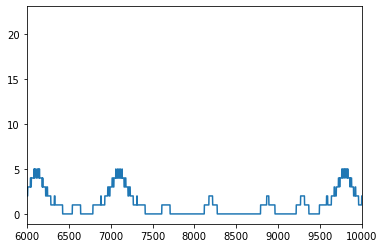

In [86]:
plt.plot(zcr)
plt.xlim([6000,10000])

(-0.03, 0.03)

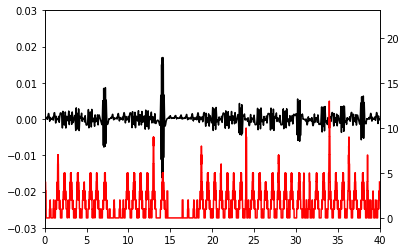

In [100]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(np.arange(n)*dt, selsig, color='black')
ax_right.plot((np.arange(len(zcr))+q)*dt, zcr, color='red')
ax_left.set_xlim([0,40])
ax_left.set_ylim([-.03,.03])

(0.0, 40.0)

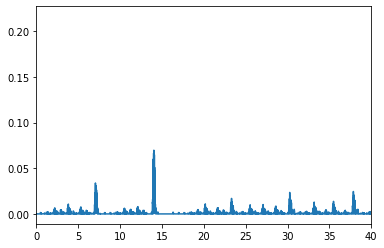

In [102]:
conv = abs(selsig[:len(zcr)])*zcr
plt.plot((np.arange(n)*dt)[:len(zcr)], conv)
plt.xlim([0,40])

(0.0, 40.0)

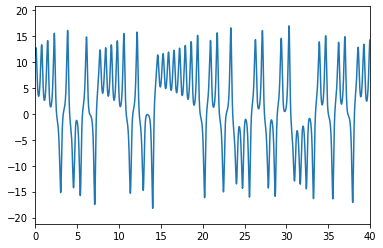

In [101]:
plt.plot(np.arange(len(data))*dt, data)
plt.xlim([0,40])

***

Code by *Francesco Barone*, last review: 31 may 2022. <br>**Workgroup**: Barone Francesco, Nagaro Gianmarco, Ninni Daniele, Valentini Lorenzo.

University of Padua, **Laboratory of Computational Physics**, module B.